In [2]:
import os
import sys
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
import tifffile as tiff
import torch as tc

In [10]:
# view mask 
mask = np.load('/root/sennet-kaggle/src/util/2d_nn/2d_segmentation.npy')
mask = mask > 25


In [24]:
test_label = cv.imread('/root/data/train/kidney_2/labels/1252.tif')
test_image = cv.imread('/root/data/train/kidney_2/images/1252.tif')

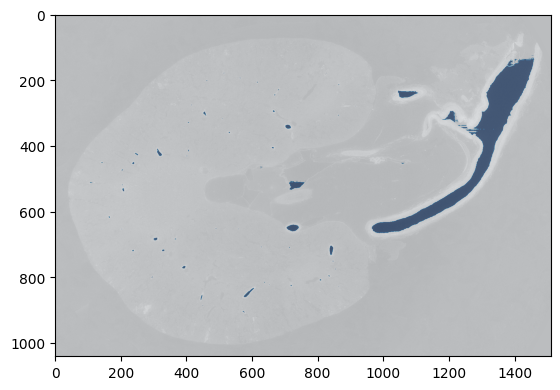

In [77]:
plt.imshow(test_image, cmap='gray')
#plt.imshow(test_label, cmap='Reds', alpha=1)
plt.imshow(mask[1252,:,:], cmap='Blues', alpha=0.5)

In [39]:
len(FP_list)

2217

In [26]:
path = "/root/data/train/kidney_2/images/" # the path to the directory that contains the tiff files
file_list = os.listdir(path) # get the list of file names in the directory
lbls = "/root/data/train/kidney_2/labels/"
lbl_list = os.listdir(lbls)
output = np.load('/root/sennet-kaggle/src/util/2d_nn/2d_segmentation.npy') # load the output file

thr = 25

inter_new_list = [] # a list to store the inter_new values for each file and label
FP_list = [] # a list to store the FP values for each file and label
FN_list = [] # a list to store the FN values for each file and label
dice_list = []

for i in range(len(file_list)): 
    img = tiff.imread(path + file_list[i]) 
    lbl = tiff.imread(lbls + lbl_list[i]) 
    gen = output[i,:,:] # works

    #gen = gen.astype(np.float32) 
    #gen = tc.from_numpy(gen)
    lbl = tc.from_numpy(lbl)
    gen = tc.from_numpy(gen)
    gen_thr = (gen > thr).int()
    lbl_thr = (lbl > thr).int()
    inter_n = (lbl_thr*gen_thr).sum(dim=(-1,-2))
    den_n = lbl_thr.sum(dim=(-1,-2)) + gen_thr.sum(dim=(-1,-2))
    dice_n = ((2*inter_n+0.001)/(den_n+0.001)).mean()

    test = gen_thr - lbl_thr
    FP = np.count_nonzero(test > 0)
    FP_list.append(FP) # append the FP value to the list

    test_FN = lbl_thr - gen_thr
    FN = np.count_nonzero(test_FN > 0)
    FN_list.append(FN) # append the FN value to the list

    inter_new = (np.count_nonzero(gen_thr) - (FN + FP))
    inter_new_list.append(inter_new) # append the inter_new value to the list'''

    dice_list.append(dice_n)


print(inter_new_list) # print the list of inter_new values
print(FP_list) # print the list of FP values
print(FN_list) # print the list of FN values


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -2, -1, -1, -1, -4, -4, -12, -11, -9, -7, -9, -7, -9, -9, -14, -12, -15, -23, -19, -10, -6, -3, 6, 12, 4, -1, -17, -9, -26, -17, -16, -23, -9, -13, -15, -6, -25, -20, -13, -17, -30, -8, 6, 0, 4, -7, -14, -6, -4, 16, -1, 4, 9, 9, 7, 11, 17, 19, 22, 25, 20, -8, 30, 52, 24, 44, 51, 60, 38, 48, 69, 64, 59, 61, 84, 75, 89, 95, 86, 120, 171, 144, 138, 150, 158, 179, 160, 179, 187, 196, 201, 198, 185, 210, 183, 190, 198, 213, 220, 267, 286, 230, 213, 255, 292, 231, 267, 263, 259, 289, 274, 280, 313, 352, 335, 358, 322, 339, 320, 325, 287, 315, 318, 284, 336, 322, 332, 339, 438, 520, 524, 519, 458, 501, 491, 486, 465, 509, 488, 482, 547, 520, 579, 594, 623, 618, 631, 621, 638, 643, 646, 688, 663, 703, 682, 726, 713, 729, 700, 699, 709, 687, 700, 693, 715, 728, 706, 704, 704, 713, 717, 760, 754,

In [ ]:
path = "/root/data/train/kidney_2/images/" # the path to the directory that contains the tiff files
file_list = os.listdir(path)

for i in range(len(file_list)):
    img = tiff.imread(path + file_list[i])
    lbl = tiff.imread(lbls + lbl_list[i])
    gen = output[i,:,:]

In [42]:
output = output > 25

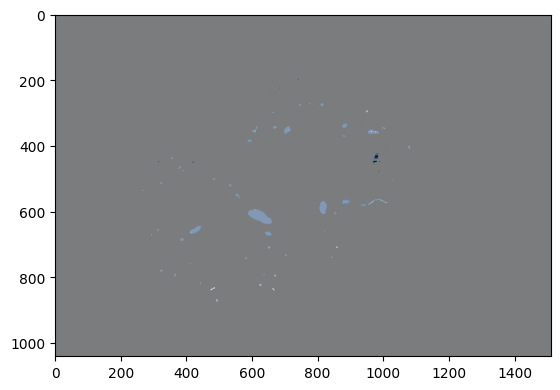

In [146]:
i_2 = 1700

plt.imshow(tiff.imread(lbls + lbl_list[i_2]), cmap='gray')
plt.imshow(output[i_2,:,:], cmap='Blues', alpha=0.5)

In [32]:
# calculate the sum of FP_list and FN_list
FP_sum = sum(FP_list)
FN_sum = sum(FN_list)


In [99]:
FN_sublists = [FN_list[x:x+100] for x in range(0, len(FN_list),100)]

In [93]:
sublists = [FP_list[i:i+100] for i in range(0, len(FP_list), 100)]

In [94]:
sums = [sum(sublist) for sublist in sublists]

In [100]:
FN_sums = [sum(FN_sublist) for FN_sublist in FN_sublists]

In [104]:
FN_sums

[659,
 9545,
 10179,
 13795,
 56564,
 59282,
 65567,
 71081,
 82820,
 21362,
 29213,
 34934,
 125587,
 32353,
 20441,
 17548,
 14284,
 15113,
 12468,
 10098,
 5442,
 760,
 0]

In [95]:
sums

[29,
 906,
 5112,
 10097,
 47554,
 49734,
 64723,
 172226,
 269228,
 74174,
 300117,
 282753,
 105389,
 76185,
 67328,
 10553,
 14059,
 11262,
 5989,
 8508,
 37085,
 30,
 31064]

In [96]:
x = range(len(sums))

In [102]:
x_FN = range(len(FN_sums))

<BarContainer object of 23 artists>

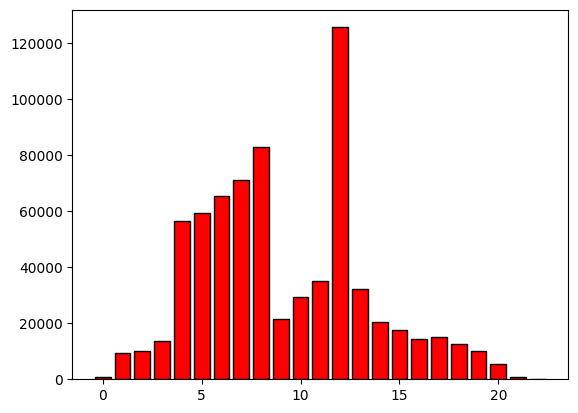

In [103]:
plt.bar(x_FN, FN_sums, color='r', edgecolor='black')

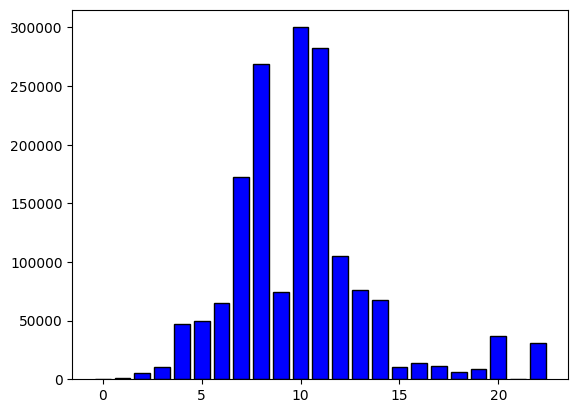

In [97]:
plt.bar(x, sums, color='blue', edgecolor='black')
plt.show()

In [83]:
len(sublists)

23

In [33]:
# find which entries in FN_list have the highest FN values
FN_max = max(FN_list)
FN_max_index = [i for i, j in enumerate(FN_list) if j == FN_max]
print(FN_max_index)


[1252]


In [35]:
FP_sum, FN_sum


# Threshold 75:    FP_sum = 563,374, FN_sum = 1,226,805
# Threshold 50:    FP_sum = 897,479, FN_sum = 903,894
# Threshold 25:    FP_sum = 1,644,105, FN_sum = 709,095

(1644105, 709095)